In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, tan, arctan, exp, log, pi, array, linspace, arange, sqrt
from numpy.linalg import norm
from mpl_toolkits import mplot3d
from ipykernel.pylab.backend_inline import flush_figures

%matplotlib widget

plt.rcParams['figure.figsize'] = [7.0, 7.0]


# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })


$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [17]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

li {
    padding: .5em;
}
</style>


<div class="alert alert-block alert-success shadow">
    <h2>One-minute Review</h2><p>A <strong>scalar field</strong> (e.g., $f(x,y)$) is a function of several variables. Its <strong>domain</strong> is the subset of input values in $\RR^n$; its <strong>image</strong> is the set of output values in $\RR$.
<p><strong>Level sets</strong> ("curves" for functions of 2 variables) are sets of input points associated to a particular output. For example, contour lines on a topographical map.</p>
</div>

    
![Map of Adirondack region](https://www.nyroute28.com/maps/oldforgetopo.jpg)

<p style="padding-bottom:40%;"> </p>

# Lecture 08 - Partial Derivatives

  - Objectives

    - Explore limits and continuity of $f(x,y)$.
    - Define partial derivatives
    - Estimate partial derivatives from contour maps and tables.
  
  - Resources
    - Content
      - Stewart: §14.2—3
      - New Strang: [§4.2](https://cnx.org/contents/oxzXkyFi@5.30:2YObsFkq@7/4-2-Limits-and-Continuity)

    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: [Continuity](https://ximera.osu.edu/mooculus/calculus3/continuityOfFunctionsOfSeveralVariables/digInContinuity) [Partial Derivatives](https://ximera.osu.edu/mooculus/calculus3/partialDerivativesAndTheGradientVector/digInPartialDerivatives)
    - Extras
      - CalcBLUE: [Partial Derivatives](https://youtu.be/3QqfUIbQpfg)

<p style="padding-bottom:40%;"> </p>

## Limits in $\RR^2$

Consider a function $f:\RR^2 \to \RR$ as mapping vectors to scalars. We write $$\lim_{(x,y) \to (a,b)} f(x,y) = L$$ if $|f(x,y) - L|$ can be made arbitrarily small by making $\sqrt{(x-a)^2+(y-b)^2}$ sufficiently small. 

### Examples

See [This screencast](https://youtu.be/EQUBHl3X7oU) for a few more/more detail. 

In [4]:
def a(TITLE):    
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(8,4))
    plt.ion()
    ax = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122)

    # scale
    
    SCALA = 1
    
    # make axes lines
    ax.plot([-SCALA,SCALA],[0,0],[0,0],'gray')
    ax.plot([0,0],[-SCALA,SCALA],[0,0],'gray')
    ax.plot([0,0],[0,0],[-SCALA,SCALA],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim3d")([-SCALA,SCALA]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    cp = ax2.contour([[0, 1], [2, 3]], cmap='viridis');
    cl = ax2.clabel(cp,fmt='%1.1f'); # inline counour labels.

    f = lambda x,y: x**2 + y**2
    g = lambda x,y: x*y/(x**2 + y**2)
    h = lambda x,y: x**2*y/(x**2 + y**2)
    k = lambda x,y: x**2*y/(x**4 + y**2)
    l = lambda x,y: x*y/sqrt(x**2 + y**2)
    
    fw = Dropdown(options={"1":[f,"x^2 + y^2"],
            "2":[g,"\\frac{xy}{x^2 + y^2}"],
            "3":[h,"\\frac{x^2y}{x^2 + y^2}"],
            "4":[k,"\\frac{x^2y}{x^4 + y^2}"],
            "5":[l,"\\frac{xy}{\\sqrt{x^2 + y^2}}"]},
                 label="1")
#     checker = Checkbox(value=False)
#     slider = FloatSlider(min=0, max=1, step=0.01)
    
#     def update_lev(change):
#         fname, func, fs = fw.value
#         lev, one_level = slider.value, checker.value
        
#         if one_level:        
#             k = (np.max(Z)*.999)*(lev)+(1-lev)*np.min(Z)

#             cl = ax.contour(X,Y,Z,offset=k,levels=[k],colors=['red'])

#             cl2 = ax2.contour(X,Y,Z,levels=[k],colors=['red'])
#             ax2.clabel(cp2,fmt='%1.1f'); # inline counour labels.
#         else:
#             for c in cl.collections:
#                 ax.collections.remove(c)
    
    def update_fw(change):
        func, fs = fw.value
        
        # print(change)
        
        while ax.collections:
            ax.collections.pop()
        ax2.clear()
        
        x = y = np.linspace(-SCALA,SCALA,400)
        X,Y = np.meshgrid(x,y)
        Z = func(X,Y)

        ax.set_zlim(np.min(Z), np.max(Z))
        
        ax.plot_surface(X,Y,Z,alpha=.5,cmap='viridis',rcount=75,ccount=75);

        ax.contour(X,Y,Z)

        ax.set_title(f"${fs}$",fontsize=16) 
        
        cp = ax2.contour(X,Y,Z,cmap='viridis');
        # fig.colorbar(cp); # for colorbar reference
        ax2.clabel(cp,fmt='%1.1f'); # inline counour labels.
    
    fw.observe(update_fw, names='value')
    # checker.observe(update_lev, names='value')
    # slider.observe(update_lev, names='value')

    update_fw({'new': fw.value})
    
    return widgets.VBox([fw, fig.canvas])

    # return widgets.VBox([HBox([fw, checker, slider]), fig.canvas])

a("Some Limits")

<p style="padding-bottom:40%;"> </p>

# Rates of Change

Limits went well. Let's try derivatives as a limit of a difference quotient. 

$$ \lim_{\langle x,y\rangle \to \langle a,b \rangle} \frac{f(x,y) - f(a,b)}{\langle x,y\rangle - \langle a,b \rangle}$$

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-danger shadow">
<strong>Blech!</strong><p>One cannot divide by vectors!</p>
</div>

### 
<p style="padding-bottom:40%;"> </p>

## A sensible question

A group of hikers follows a curving path up a mountain ridge. How steep is their path at the halfway point?


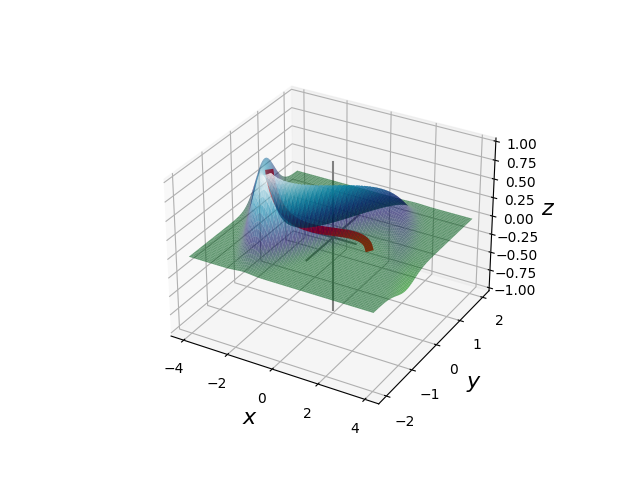

In [19]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    func = lambda x,y: exp(-4*(y-sin(x))**2)*(1-np.abs(x+pi/2)/5)
    
    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=100,ccount=100);
    t = np.linspace(-pi/2,pi/2,100)
    X = t
    Y = t/pi - 1/2 - t*(t**2-pi**2/4)/5
    Z = func(X,Y)
    ax.plot(X,Y,Z,lw=6,color='r',alpha=1)
    
    return fig.canvas

a("A casual hike")

[3Demos version](https://tinyurl.com/4adh3xn5)

<p style="padding-bottom:40%;"> </p>

## Partial Derivatives

We start by considering "one direction at a time".

<div class="alert alert-block alert-info shadow">
<h3>Definition</h3>
<p>The <b>partial derivative</b> of a function $f(x,y)$ with respect to $x$ at the point $(a,b)$ is</p> $$f_x(a,b) = \lim_{h\to 0} \frac{f(a+h,b) - f(a,b)}{h}.$$
</div>

<p style="padding-bottom:40%;"> </p>


The **partial derivative** of a function $f(x,y)$ with respect to $y$ at the point $(a,b)$ is $$f_y(a,b) = \lim_{h\to 0} \frac{f(a,b+h) - f(a,b)}{h}.$$

In [16]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    func = lambda x,y: exp(-4*(y-sin(x))**2)*(1-np.abs(x+pi/2)/5)

    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=100,ccount=100);
    t = np.linspace(-pi,pi,100)
    X = t
    Y = np.zeros_like(X)

    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    Z = func(X,Y)
    pl = ax.plot(X,Y,Z,lw=6,color='r',alpha=1)[0]
    
    def update(change):
        X, Y, Z = pl.get_data_3d()
        Y, X = X, Y
        Z = func(X, Y)
        pl.set_data_3d(X, Y, Z)
    
    drop = widgets.Dropdown(options=['x', 'y'], index=0)
    drop.observe(update, names='value')
    
    return widgets.VBox([drop, fig.canvas])

a("Two directions")

<div class="alert alert-block alert-warning shadow">
<h4>Other notation</h4>
<p>All of these are equivalent. </p>

$$f_x = \frac{\partial f}{\partial x} = \partial_x f = f^{(1,0)}$$

<p>and there are many more.</p>
</div>


<p style="padding-bottom:40%;"> </p>

### Computing $\frac{\partial f}{\partial x}$

In practice, we compute partial derivatives by **treating all variables except the variable in question as constant**.

<div class="alert alert-block alert-success shadow">
<h3>Examples</h3>

<p>Compute:</p>
<ol>
    <li> $\displaystyle \frac{\partial}{\partial x} \left( x^2y - \sin(x-2y) \right)$ </li>
    <li> $\displaystyle \frac{\partial}{\partial y} \left( x^2y - \sin(x-2y) \right)$ </li>
    <li> $\displaystyle \frac{\partial}{\partial z} \left( \frac{z^2 \tan^{-1}(\sqrt{x^2+1})}{\cosh(xy)} \right)$ </li>
    </ol></div>

<p style="padding-bottom:40%;"> </p>

# Higher Order Derivatives

Since the partial derivative of a function is a function, we can iterate the process. 

$$f_{xx} = \frac{\partial^2 f}{\partial x^2}$$
$$f_{xy} = \frac{\partial^2 f}{\partial y \partial x}$$

etc.

<p style="padding-bottom:40%;"> </p>

## Interpretation 

The case of a second derivative of a single variable easily relates to the one-variable case and the concept of **concavity**. A function $f$ for which $f_{xx} > 0$ is said to be "concave up in the $x$-direction". 

### Example: Heat Equation

The temperature at time $t$ at position $x$ along a straight bar is given by a function $u(t,x)$. The evolution of the temperature distribution is governed by the **heat equation** $$u_t = u_{xx}.$$
This is a **partial differential equation** or **PDE**, but don't let it intimidate you. 

One could interpret this equation as stating, "Where the temperature distribution is concave down, the bar will cool; where it is concave up, the bar will warm."

In [55]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10,5))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    plt.ion()
    
    x = np.linspace(-3, 3, 100)
    y = np.linspace(0, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    t = 0.05

    ax.set_ylim([0, 1.5])
    ax.set_ylabel("temp")
    ax.set_xlabel("position")
    
    u = lambda x,t: exp(-x**2/t)/sqrt(2*pi*t)
    
    pc = ax.pcolormesh(X, Y, u(X,t) + u(X-2,t+1/2), vmin=0, vmax=.6, cmap='rainbow', shading='auto')
    pl = ax.plot(x, u(x,t) + u(x - 2,t+1/2), color='k', lw=3, zorder=2)[0]
    pl2 = ax2.plot(x, t*np.ones_like(y), color='k', lw=3, zorder=2)[0]

    cf = ax2.pcolormesh(X,Y+.05,u(X,Y+.05)+u(X-2,Y+1/2+.05), vmin=0, vmax=.6, cmap='rainbow', shading='auto');
    ax2.set_ylabel("time")
    fig.colorbar(cf)
    ax2.set_xlabel("position");    

    def update(change):
        t = change.get('new', 1)
        while ax.collections:
            ax.collections.pop()
        pc = ax.pcolormesh(X, Y, u(X,t) + u(X-2,t+1/2), vmin=0, vmax=.6, cmap='rainbow', shading='auto')
        pl.set_data(x, u(x,t) + u(x-2,t+1/2))
        pl2.set_data(x, t*np.ones_like(y))
    
    slider = widgets.FloatSlider(min=0.001, max = 10, step=0.01, value=0.05)
    slider.observe(update, names='value')
    
    return widgets.VBox([slider, fig.canvas])

a("Cool off")

<p style="padding-bottom:40%;"> </p>

## Mixed partials

A quantity like $\frac{\partial^2 f}{\partial x \partial y}$ is a little harder to wrap ones head around. 

Compute all mixed partials of the following funtions:
  
  1. $f(x,y) = xy^3 - y \sin x$
  2. $r(x,t) = \frac{x}{x+t}$
  2. $u(p,q) = e^{-p\sqrt{q}}$
      

<p style="padding-bottom:40%;"> </p>

## Clairaut's Theorem

If all mixed partials of a function $f$ exist and are continuous in a neighborhood of a point, then $$ \frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x}.$$

Here is a quick illustration justifying Clairaut's Theorem. 

Suppose you connect 4 points in space, each at a different height and directly over the corner of a square (side length $\Delta s$). 

### Exercise
Compute the **differences of the slopes** on opposite sides of the square,

In [46]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(TITLE)
    ax = fig.add_subplot(111,projection='3d')
    plt.ion()

    slider = widgets.FloatSlider(min=.5, max = 4.5)
    b = slider.value
    pl = ax.plot([0,0,1,1,0],[0,1,1,0,0],[2,1,3,b,2],'r')[0]
    
    ax.set_xlim([-.1,1.1])
    ax.set_ylim([-.1,1.1])
    ax.set_zlim([0,5])
    
    x = y = np.linspace(-.1,1.1,60)
    x,y=np.meshgrid(x,y)
    
    ax.plot_surface(x,y,(1-y)*((1-x)*2+b*x) + y*((1-x)+3*x),alpha=.5,cmap="viridis")
    tt = ax.text(1,0,b+.2,"$B$",fontsize=14)
    ax.text(0,0,2+.2,"$A$",fontsize=14)
    ax.text(0,1,1+.2,"$C$",fontsize=14)
    ax.text(1,1,3+.2,"$D$",fontsize=14)
    
    def update(change):
        while ax.collections:
            ax.collections.pop()
        b = change.get('new', 1)
        tt.set_z(b + .2)
        ax.plot_surface(x,y,(1-y)*((1-x)*2+b*x) + y*((1-x)+3*x),alpha=.5,cmap="viridis")
        pl.set_data_3d([0,0,1,1,0],[0,1,1,0,0],[2,1,3,b,2])
        
    slider.observe(update, names='value')
    
    return widgets.VBox([slider, fig.canvas])

a("Mixed Differences")


<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-success shadow">
<h3>Quick exercise</h3>

<p>Compute $g_{zzxw}$ for </p>$$g(w,x,y,z)= w^2 x^3 y z^2+\sin \left(\frac{x y}{z^2}\right).$$
</div> 

<p style="padding-bottom:40%;"> </p>

### Example 

Here is contour plot for hours of daylight as a function of latitude and day of year. Here are some questions we can ask. 

  - When is length-of-day increasing fastest in New York?
  - How much less daylight do you get by moving a degree north from Irkutsk on Halloween?
  - Where and when does heading south gain you the most daylight?

![Daylight as a function of latitude and time of year](https://upload.wikimedia.org/wikipedia/commons/e/e1/Hours_of_daylight_vs_latitude_vs_day_of_year_cmglee.svg)

<p style="padding-bottom:40%;"> </p>

### Example

Below is a contour plot of a function $f(x,y)$. Estimate the partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ at each labeled point. 

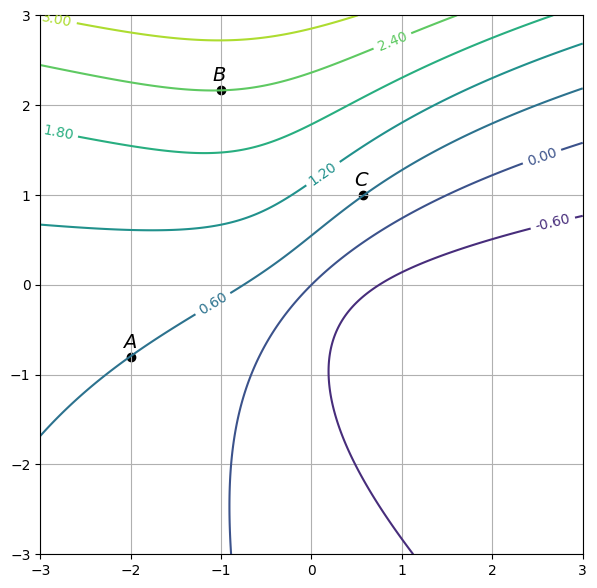

In [16]:
X = Y = np.linspace(-3,3,400)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(7,7))
cs = plt.contour(X,Y,Z)
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.scatter(pts[0],pts[1],color='k')
for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
plt.grid(True)
plt.clabel(cs,fmt="%1.2f");

Does this make your estimates more or less accurate?

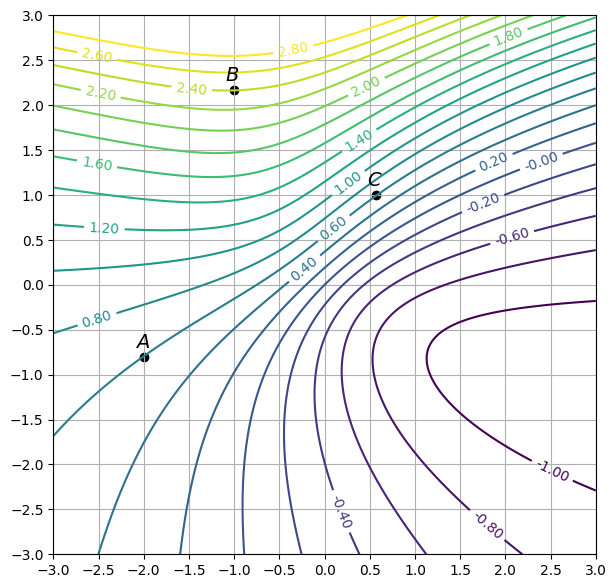

In [15]:
X = Y = np.linspace(-3,3,150)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(7,7))
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.grid(True,'both')
plt.xticks(np.arange(-3,4,.5))
plt.yticks(np.arange(-3,4,.5))

for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
cs = plt.contour(X,Y,Z,levels=np.arange(-1,3,.2))
plt.scatter(pts[0],pts[1],color='k')
plt.clabel(cs,fmt="%1.2f");